<a href="https://colab.research.google.com/github/skredenmathias/DS-Unit-1-Build/blob/master/Build_Week_1_UFC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [0]:
# Display options set to max
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

In [3]:
# Source the data
!git clone https://github.com/skredenmathias/DS-Unit-1-Build.git

Cloning into 'DS-Unit-1-Build'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 23 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (23/23), done.


In [0]:
path = '/content/DS-Unit-1-Build/'

In [0]:
from zipfile import ZipFile

zip_file = ZipFile(path+'ufcdata.zip')

In [0]:
UFC = pd.read_csv(zip_file.open('data.csv'))

In [7]:
# Check for NaN values
UFC.isnull().sum()

R_fighter                          0
B_fighter                          0
Referee                           23
date                               0
location                           0
Winner                             0
title_bout                         0
weight_class                       0
no_of_rounds                       0
B_current_lose_streak              0
B_current_win_streak               0
B_draw                             0
B_avg_BODY_att                  1265
B_avg_BODY_landed               1265
B_avg_CLINCH_att                1265
B_avg_CLINCH_landed             1265
B_avg_DISTANCE_att              1265
B_avg_DISTANCE_landed           1265
B_avg_GROUND_att                1265
B_avg_GROUND_landed             1265
B_avg_HEAD_att                  1265
B_avg_HEAD_landed               1265
B_avg_KD                        1265
B_avg_LEG_att                   1265
B_avg_LEG_landed                1265
B_avg_PASS                      1265
B_avg_REV                       1265
B

In [0]:
# For our purposes we can drop all rows with NaN values.
UFC=UFC.dropna()

## Filter dataset to heavyweight and lightweight

In [0]:
UFC_lightweight = (UFC['weight_class'] == 'Lightweight')
UFC_heavyweight = (UFC['weight_class'] == 'Heavyweight')


In [0]:
lightweight = UFC[UFC_lightweight]
heavyweight = UFC[UFC_heavyweight]

In [11]:
print(lightweight.shape)
lightweight.head()

(644, 145)


,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,3.0,0.0,15.354839,11.322581,6.741935,4.387097,84.741935,38.580645,5.516129,3.806452,67.645161,23.258065,0.645161,14.000000,12.193548,0.935484,0.096774,97.000000,46.774194,0.496129,0.354839,2.161290,0.677419,0.295484,103.709677,52.548387,8.0,8.0,17.903226,11.870968,8.419355,5.838710,84.548387,38.064516,1.741935,0.935484,67.645161,25.483871,0.225806,9.161290,7.483871,0.032258,0.032258,94.709677,44.838710,0.453226,0.096774,2.096774,0.225806,0.063548,100.387097,49.774194,68.0,581.870968,1.0,0.0,0.0,7.0,10.0,6.0,0.0,23.0,Orthodox,185.42,185.42,155.0,0.0,11.0,0.0,13.866667,8.666667,2.866667,1.733333,116.133333,49.466667,5.333333,4.266667,96.733333,35.600000,0.200000,13.733333,11.200000,0.333333,0.133333,124.333333,55.466667,0.430000,1.000000,0.933333,0.400000,0.277333,133.000000,63.400000,11.0,1.0,14.466667,8.133333,2.800000,0.733333,91.066667,32.200000,4.866667,2.800000,78.266667,23.200000,0.266667,6.000000,4.400000,0.333333,0.133333,98.733333,35.733333,0.340000,0.066667,2.866667,0.666667,0.131333,102.133333,38.600000,33.0,604.400000,2.0,0.0,1.0,3.0,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
16,Damir Hadzovic,Christos Giagos,Rich Mitchell,2019-06-01,"Stockholm, Sweden",Blue,False,Lightweight,3,0.0,1.0,0.0,7.000000,4.200000,4.600000,2.600000,42.800000,11.000000,12.800000,6.200000,

In [12]:
print(heavyweight.shape)
heavyweight.head()

(264, 145)


,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,1.0,0.0,17.00,14.500,2.500,2.000,201.000,59.5,0.00,0.000,184.5,45.0,0.00,2.0,2.000,0.00,0.000,203.50,61.50,0.31000,0.0,0.000,0.000,0.00000,204.00,62.0,1.0,1.0,42.500,23.5,0.5,0.50,205.000,89.5,0.000,0.00,152.500,56.500,0.00,10.50,10.000,0.000,0.00,205.5,90.0,0.4300,0.0,0.500,0.0,0.000,205.500,90.000,8.0,1200.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Southpaw,180.34,185.42,250.0,1.0,0.0,0.0,7.750000,6.750000,11.000000,7.250000,50.750000,24.750000,0.500000,0.500000,50.750000,22.75,0.500000,3.750000,3.000000,0.250000,0.000000,62.250000,32.500000,0.545000,0.000000,0.500000,0.000000,0.000000,63.500000,32.75,3.0,1.0,6.25,4.750000,4.500000,3.500000,42.750000,16.250000,7.750000,2.750000,43.250000,14.000000,0.25,5.500000,3.750000,0.750000,0.000000,55.000000,22.500000,0.397500,0.000000,1.000000,0.000000,0.000000,60.500000,27.750000,7.0,440.750000,0.0,0.0,0.0,1.0,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0
60,Arjan Bhullar,Juan Adams,Yves Lavigne,2019-05-04,"Ottawa, Ontario, Canada",Red,False,Heavyweight,3,0.0,1.0,0.0,8.00,8.000,15.000,13.000,85.000,38.0,44.00,35.000,131.0,74.0,0.00,5.0,4.000,4.00,0.000,144.00,86.00,0.59000,0.0,2.000,2.000,1.00000,180.00,121.0,1.0,0.0,11.000,10.0,7.0,3.00,67.000,36.0,2.000,2.00,64.000,30.000,0.00,1.00,1.000,0.000,0.00,76.0,41.0,0.5300,0.0,2.000,1.0,0.500,81.000,4

In [0]:
# Creating a dataframe with both lightweight and heavyweight fighters
ufc_light_heavy_df = UFC[UFC['weight_class'].isin(['Lightweight',
                                                   'Heavyweight'])]

In [14]:
ufc_light_heavy_df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,3.0,0.0,15.354839,11.322581,6.741935,4.387097,84.741935,38.580645,5.516129,3.806452,67.645161,23.258065,0.645161,14.0,12.193548,0.935484,0.096774,97.000000,46.774194,0.496129,0.354839,2.161290,0.677419,0.295484,103.709677,52.548387,8.0,8.0,17.903226,11.870968,8.419355,5.838710,84.548387,38.064516,1.741935,0.935484,67.645161,25.483871,0.225806,9.161290,7.483871,0.032258,0.032258,94.709677,44.838710,0.453226,0.096774,2.096774,0.225806,0.063548,100.387097,49.774194,68.0,581.870968,1.0,0.0,0.0,7.0,10.0,6.0,0.0,23.0,Orthodox,185.42,185.42,155.0,0.0,11.0,0.0,13.866667,8.666667,2.866667,1.733333,116.133333,49.466667,5.333333,4.266667,96.733333,35.600000,0.200000,13.733333,11.200000,0.333333,0.133333,124.333333,55.466667,0.430000,1.000000,0.933333,0.400000,0.277333,133.000000,63.400000,11.0,1.0,14.466667,8.133333,2.800000,0.733333,91.066667,32.200000,4.866667,2.800000,78.266667,23.200000,0.266667,6.000000,4.400000,0.333333,0.133333,98.733333,35.733333,0.340000,0.066667,2.866667,0.666667,0.131333,102.133333,38.600000,33.0,604.400000,2.0,0.0,1.0,3.0,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,1.0,0.0,17.000000,14.500000,2.500000,2.000000,201.000000,59.500000,0.000000,0.000000,18

## Exploring weights in the lightweight & heavyweight divisions

In [0]:
# Filter the data
lightweight_weight = lightweight['R_Weight_lbs']
heavyweight_weight = heavyweight['R_Weight_lbs']

# Mean weights
lightweight_weight_mean = round(lightweight_weight.mean())
heavyweight_weight_mean = heavyweight_weight.mean()

In [16]:
# Compare the means
print("Lightweight weight mean: ", lightweight_weight_mean)
print("Heavyweight weight mean: ", heavyweight_weight_mean)

Lightweight weight mean:  156
Heavyweight weight mean:  250.0


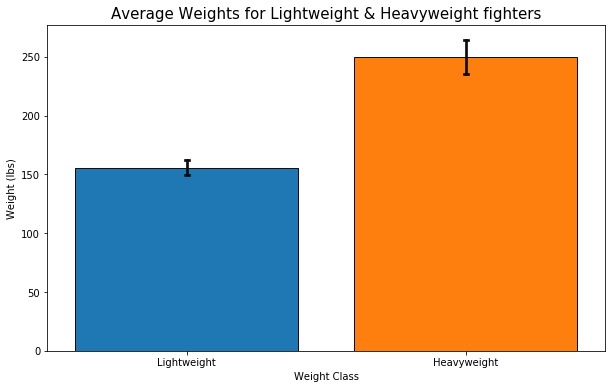

In [17]:
# Plot the weights of lightweight and heavyweight fighters

# Plot & Present data
f, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x='weight_class', y='R_Weight_lbs', data=ufc_light_heavy_df,
                 ci='sd', capsize=.015, saturation=2,
                 errcolor='.05', edgecolor=".05")

# Styling & Labeling
sns.set(style="whitegrid")
ax.set(xlabel='Weight Class', ylabel='Weight (lbs)')
plt.title("Average Weights for Lightweight & Heavyweight fighters", fontsize=15)

plt.show()

## Exploring the differences in fight duration

In [0]:
# Isolate total time fought for the two divisions
total_time_lightweight = lightweight['R_total_time_fought(seconds)']
total_time_heavyweight = heavyweight['R_total_time_fought(seconds)']

In [19]:
# Mean Total Times
print("Mean time Lightweight: ", total_time_lightweight.mean())
print("Mean time Heavyweight: ", total_time_heavyweight.mean())

Mean time Lightweight:  628.2407808631972
Mean time Heavyweight:  475.4657674453077


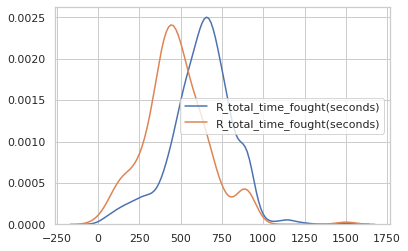

In [20]:
# Explore the relationship
sns.kdeplot(total_time_lightweight) # Blue is LW
sns.kdeplot(total_time_heavyweight);

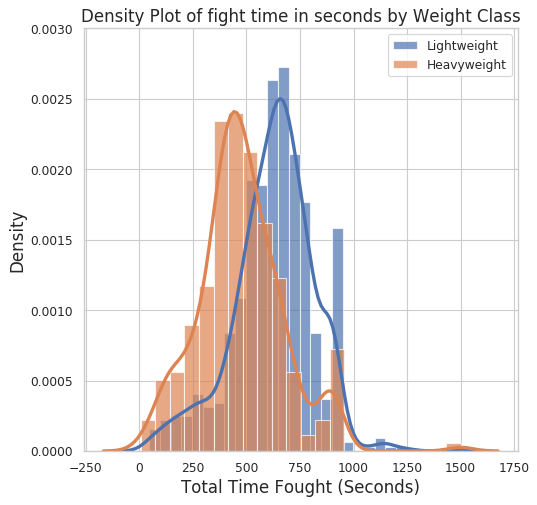

In [21]:
# Draw Plot
plt.figure(figsize=(7,7), dpi=80, )
sns.distplot(total_time_lightweight, label="Lightweight",
             hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(total_time_heavyweight, label="Heavyweight",
             hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
# Label
plt.ylim(0, 0.003)
plt.xlabel('Total Time Fought (Seconds)', fontsize=15)
plt.ylabel('Density', fontsize=15)

# Decoration
plt.title('Density Plot of fight time in seconds by Weight Class', fontsize=15)
plt.legend()
plt.show()

## Exploring how fighting styles differ in the two divisions

In [0]:
# Filter Strikes
# Round result for graphing purposes

strikes_attempted_light = round(lightweight['R_avg_TOTAL_STR_att'].mean())
strikes_connected_light = round(lightweight['R_avg_TOTAL_STR_landed'].mean())

significant_strikes_attempted_light = round(lightweight['R_avg_SIG_STR_att'].mean())
significant_strikes_landed_light = round(lightweight['R_avg_SIG_STR_landed'].mean())

### ----------------------------------------------------------
strikes_attempted_heavy = round(heavyweight['R_avg_TOTAL_STR_att'].mean())
strikes_connected_heavy = round(heavyweight['R_avg_TOTAL_STR_landed'].mean())

significant_strikes_attempted_heavy = round(heavyweight['R_avg_SIG_STR_att'].mean())
significant_strikes_landed_heavy = round(heavyweight['R_avg_SIG_STR_landed'].mean())

In [0]:
# Make to equal length lists
lightweight_strikes = [strikes_attempted_light, strikes_connected_light, significant_strikes_attempted_light, significant_strikes_landed_light]
heavyweight_strikes = [strikes_attempted_heavy, strikes_connected_heavy, significant_strikes_attempted_heavy, significant_strikes_landed_heavy]

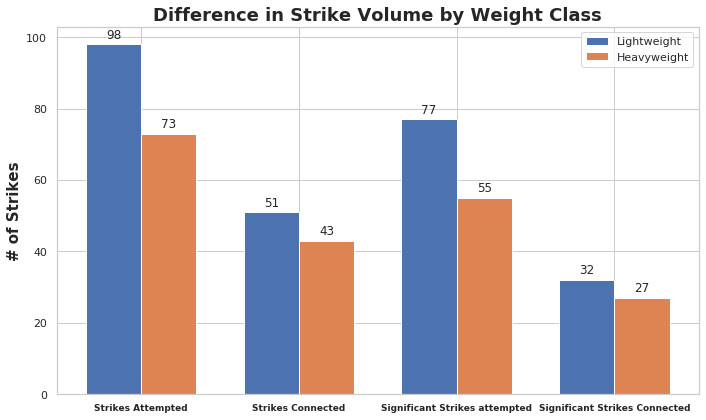

In [24]:
# Plot

# Label
labels = ['Strikes Attempted', 'Strikes Connected', 'Significant Strikes attempted', 'Significant Strikes Connected']
x = np.arange(len(labels))

width = 0.35 # Bar Width

# Plot data
fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width/2, lightweight_strikes, width, label='Lightweight')
rects2 = ax.bar(x + width/2, heavyweight_strikes, width, label='Heavyweight')

# Text for labels, title and custom x-axis tick labels
ax.set_ylabel('# of Strikes', fontsize=15, fontweight='semibold')
ax.set_title('Difference in Strike Volume by Weight Class', fontsize=18, fontweight='semibold')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=9, fontweight='semibold')
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()